In [1]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# Load results
result_anew_path = './output_anew.csv'
anew_df = pd.read_csv(result_anew_path)
result_nrc_path = './output_nrc.csv'
nrc_df = pd.read_csv(result_nrc_path)
result_trump = './output_trump_anew.csv'
trump_df_anew = pd.read_csv(result_trump)
result_trump_nrc = './output_trump_nrc.csv'
trump_df_nrc = pd.read_csv(result_trump_nrc)

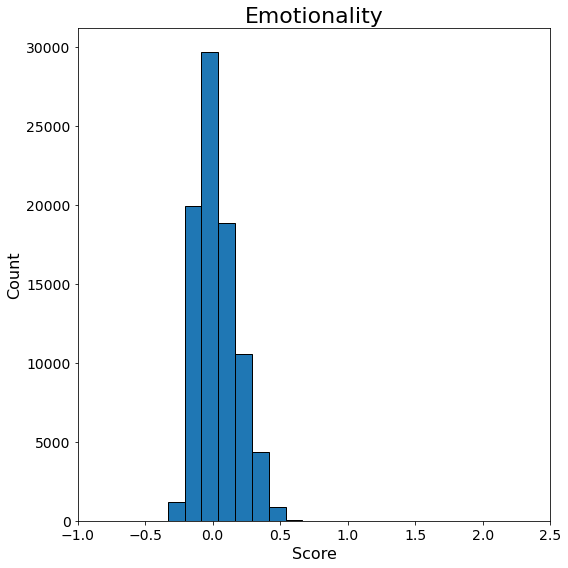

In [3]:
fig = plt.figure(figsize=(8,8))
anew_df['emotionality'].hist(bins=8, histtype='bar', ec='black', grid=False)
plt.title('Emotionality', fontsize=22)
plt.xlabel('Score', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(np.arange(-1,3,0.5))
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()
fig.savefig('../figures/emotionality-result.png')

In [91]:
def plot_result_hist(df, bins=8, xlabel_rot=None):
      if xlabel_rot is None:
            xlabel_rot = 0
      fig, axs = plt.subplots(1, 3, figsize=(21,7), sharex=True, sharey=True)
      axs = axs.ravel()
      mapping_dict = {
            'Valence': 'valence',
            'Arousal': 'arousal',
            'Dominance': 'dominance',
            # 'Affection': 'emotionality'
      }
      for i, d in enumerate(mapping_dict.keys()):
            df[mapping_dict[d]].hist(bins=bins, ax=axs[i], histtype='bar', ec='black', grid=False)
            axs[i].set_title(d, fontsize=16)
            # axs[i].tick_params(axis='both', which='major', labelsize=14)
            axs[i].tick_params('x', labelrotation=xlabel_rot)
            axs[i].set_xticks(np.arange(-1,3,0.5))
            # axs[i].set_yscale('log')
      # plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)

      fig.supxlabel('Score', fontsize=16)
      fig.supylabel('Count', fontsize=16)
            # axs[i].set_xticks()
      plt.tight_layout()

      plt.show()
      return fig

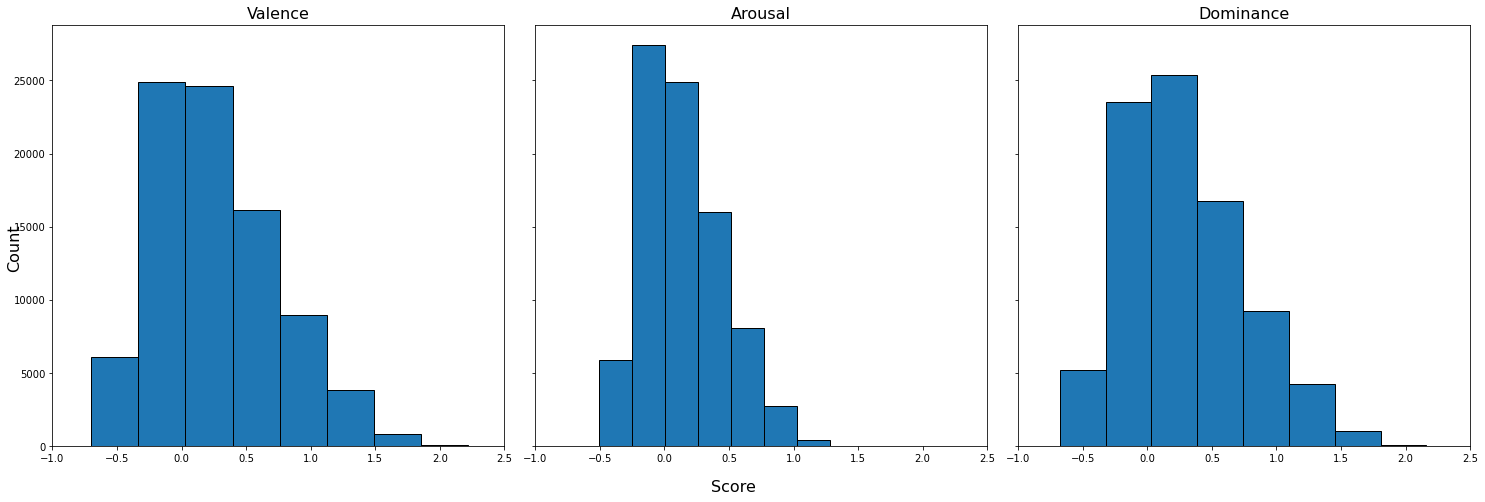

In [134]:
fig = plot_result_hist(anew_df)
fig.savefig('../figures/anew-all-result.png')

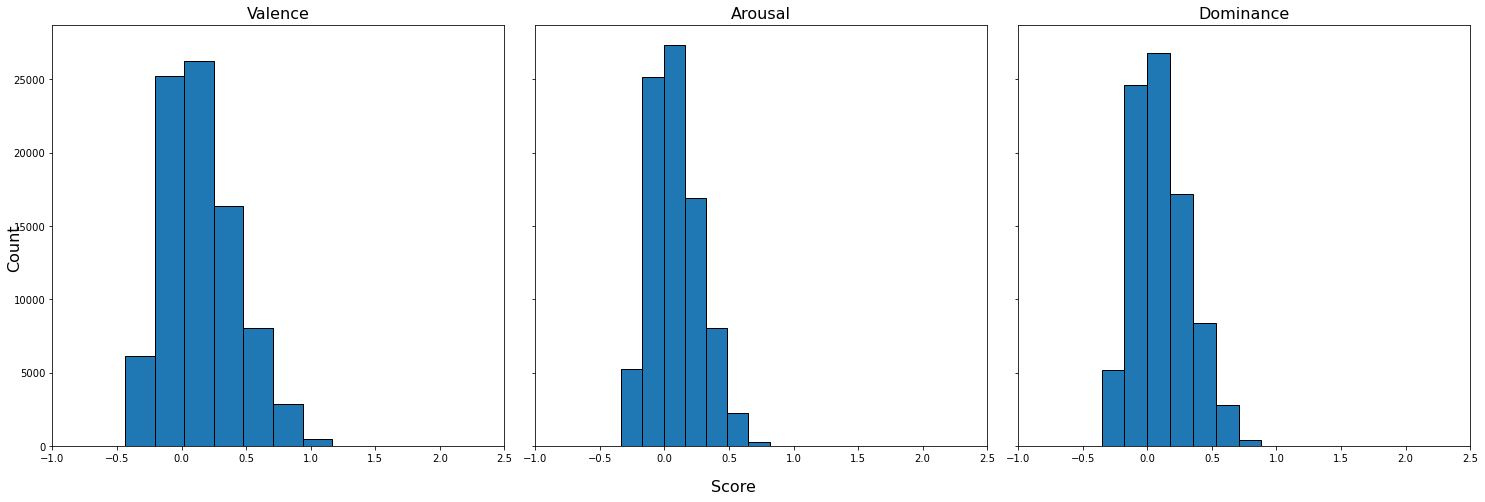

In [135]:
fig = plot_result_hist(nrc_df)
fig.savefig('../figures/nrc-all-result.png')

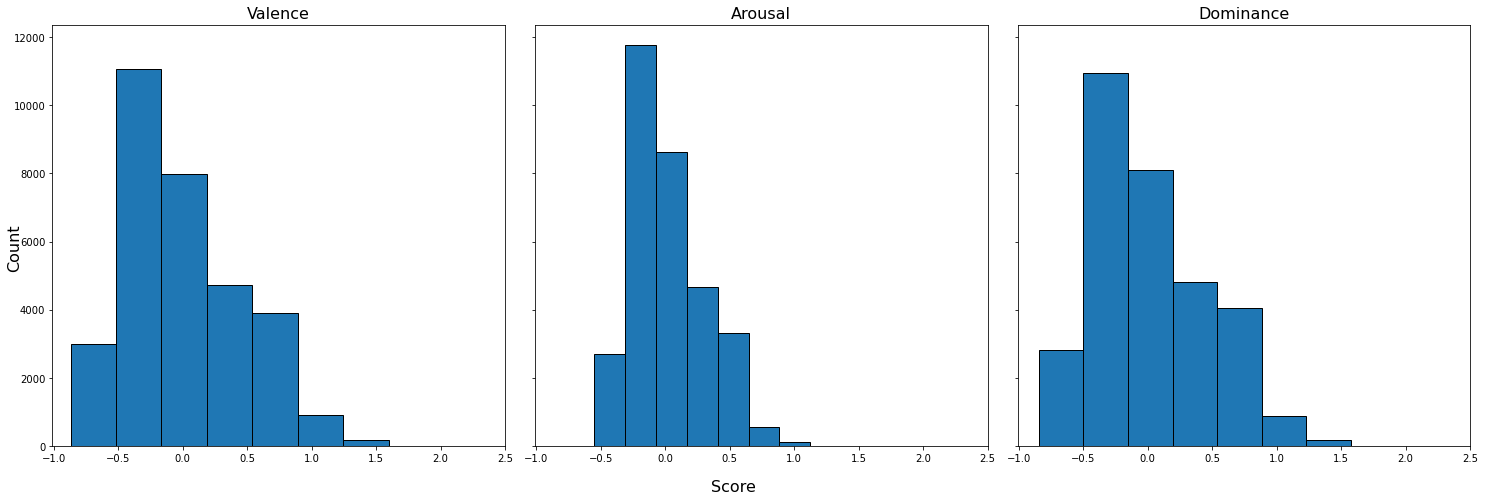

In [93]:
fig = plot_result_hist(trump_df_anew)
fig.savefig('../figures/trump-result.png')

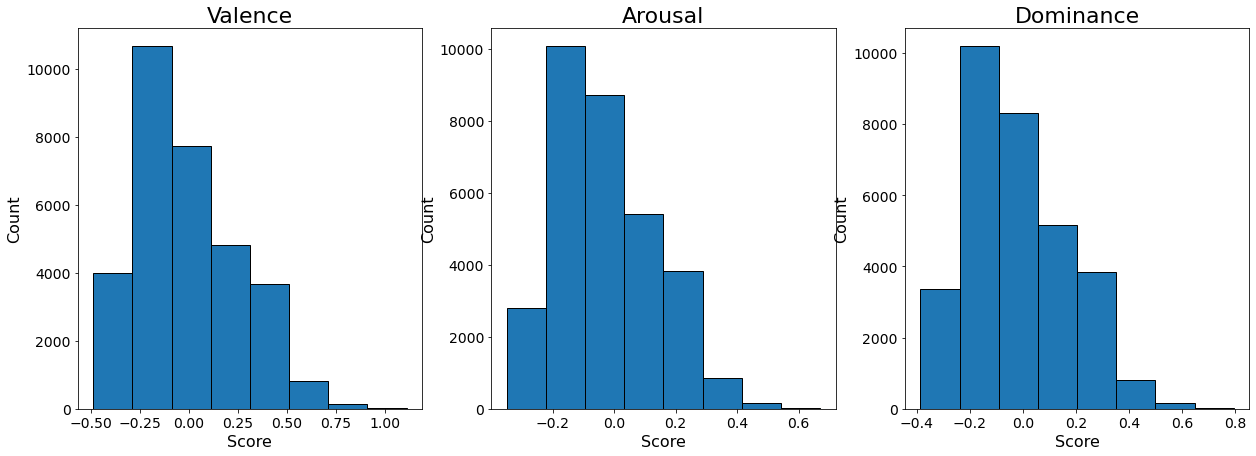

In [30]:
plot_result_hist(trump_df_nrc)

## Regression

In [138]:
import statsmodels.api as sm

In [143]:
mod=sm.OLS(anew_df['emotionality'],sm.add_constant(anew_df[['valence', 'arousal', 'dominance']]))

In [151]:
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           emotionality   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                 5.820e+04
Date:                Fri, 18 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:30:23   Log-Likelihood:                 90245.
No. Observations:               85447   AIC:                        -1.805e+05
Df Residuals:                   85443   BIC:                        -1.804e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0024      0.000     -6.415      0.000      -0.003      -0.002
valence        0.1492      0.006     23.572      0.000       0.137       0.162
arousal        0.6438      0.003    256.366      0.000       0.639       0.649
dominance     -0.3482      0.006    -54.150      0.000      -0.361      -0.336
==============================================================================
Omnibus:                       66.037   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.239
Skew:                          -0.066   Prob(JB):                     4.13e-15
Kurtosis:                       3.033   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Parties

In [14]:
party_anew_df = anew_df[['Party', 'valence', 'arousal', 'dominance', 'emotionality']]
party_nrc_df = nrc_df[['Party', 'valence', 'arousal', 'dominance', 'emotionality']]

In [15]:
party_anew_df.groupby('Party').mean()

,valence,arousal,dominance,emotionality
Party,,,,
Democrat,0.208845,0.118069,0.233993,0.030955
Republican,0.315515,0.163249,0.332356,0.026689


In [16]:
party_nrc_df.groupby('Party').mean()

,valence,arousal,dominance,emotionality
Party,,,,
Democrat,0.110307,0.057541,0.075654,0.030955
Republican,0.187852,0.113604,0.137419,0.026689


In [100]:
def box_plot_party(df, x='Party'):
    fig, axs = plt.subplots(1, 3, figsize=(8, 8))
    axs = axs.ravel()

    sns.boxplot(x=x, y='valence', data=df, ax=axs[0], color='g')
    axs[0].set_title('Valence', fontsize=16)

    sns.boxplot(x=x, y='arousal', data=df, ax=axs[1], color='g')
    axs[1].set_title('Arousal', fontsize=16)

    sns.boxplot(x=x, y='dominance', data=df, ax=axs[2], color='g')
    axs[2].set_title('Dominance', fontsize=16)

    
    # sns.boxplot(x='Party', y='emotionality', data=df, ax=axs[3])
    # axs[3].set_title('Emotionality', fontsize=16)

    for i in range(3):
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')

    fig.supxlabel(x, fontsize=16)
    fig.supylabel('Score', fontsize=16)
    plt.tight_layout()
    plt.show()

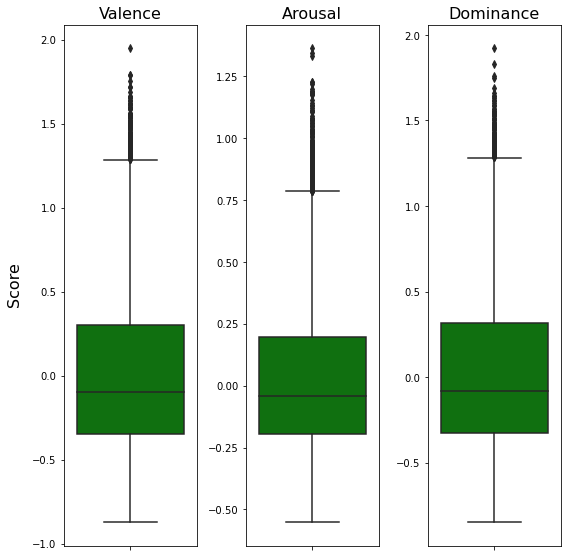

In [101]:
box_plot_party(trump_df_anew, None)

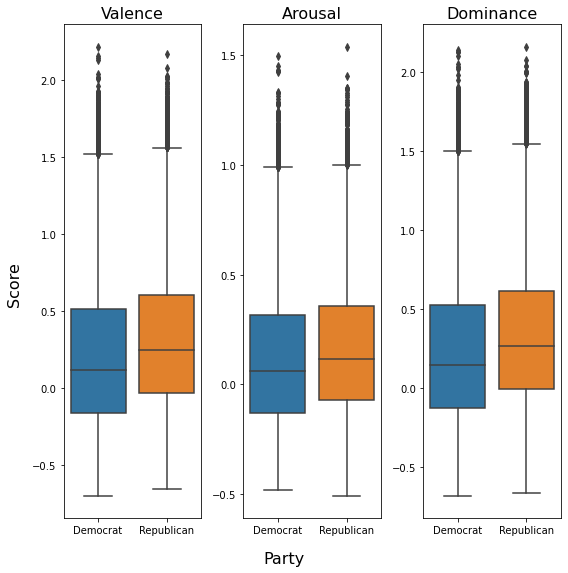

In [26]:
box_plot_party(party_anew_df)

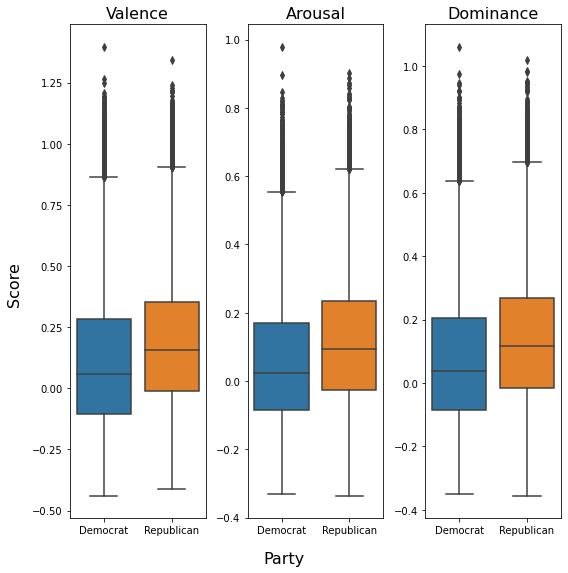

In [27]:
box_plot_party(party_nrc_df)

## Handles

In [14]:
democrat_df = anew_df[anew_df.Party=='Democrat'][['Handle', 'valence', 'arousal']]

In [15]:
democrat_handle = democrat_df.groupby('Handle').mean()
democrat_handle

,valence,arousal
Handle,,
AGBecerra,0.223490,0.073324
AlanGrayson,0.256687,0.108436
AnthonyBrownMD4,0.290448,0.110458
BennieGThompson,0.226698,0.013455
BettyMcCollum04,0.252244,0.068886
...,...,...
repjohnlewis,0.231683,0.092220
repmarkpocan,0.265879,0.046514
repsandylevin,0.106372,-0.038067


In [16]:
republican_df = anew_df[anew_df.Party=='Republican'][['Handle', 'valence', 'arousal']]

In [17]:
republican_handle = republican_df.groupby('Handle').mean()
republican_handle

,valence,arousal
Handle,,
AustinScottGA08,0.329409,0.058621
ConawayTX11,0.309676,0.045847
CongCulberson,0.256612,0.112237
CongMikeSimpson,0.353913,0.107160
CongressmanDan,0.317502,0.064005
...,...,...
repdonyoung,0.370935,0.085745
repgregwalden,0.315058,0.050427
replouiegohmert,0.272751,0.028334


## Hashtag

In [37]:
from collections import Counter


In [58]:
hashtags_df = anew_df.loc[anew_df.hashtags.dropna().index]
hashtags_df['hashtags_list'] = hashtags_df.hashtags.map(lambda x: x.split(','))

In [59]:
hashtags_list = []
for ht in hashtags_df.hashtags_list:
    hashtags_list.extend(ht)

hashtags_list_d = []
for ht in hashtags_df[hashtags_df.Party=='Democrat'].hashtags_list:
    hashtags_list_d.extend(ht)

hashtags_list_r = []
for ht in hashtags_df[hashtags_df.Party=='Republican'].hashtags_list:
    hashtags_list_r.extend(ht)

In [60]:
Counter(hashtags_list_d).most_common(5)

[('#GOPTaxScam', 629),
 ('#DACA', 267),
 ('#NetNeutrality', 261),
 ('#FarmBill', 133),
 ('#SNAP', 132)]

In [61]:
Counter(hashtags_list_r).most_common(5)

[('#TaxReform', 567),
 ('#TaxCutsandJobsAct', 533),
 ('#taxreform', 335),
 ('#SOTU', 263),
 ('#TaxDay', 178)]

In [54]:
pop_ht_d = [h[0] for h in Counter(hashtags_list_d).most_common(5)]
pop_ht_r = [h[0] for h in Counter(hashtags_list_r).most_common(5)]


In [71]:
scores = {}
tmp_df = hashtags_df[hashtags_df.Party=='Democrat']
for h in pop_ht_d:
    tmp = hashtags_df[hashtags_df['hashtags'].str.contains(h)][['valence', 'arousal', 'dominance']].mean(axis=0)
    scores[h] = {
        'valence': tmp.valence,
        'arousal': tmp.arousal,
        'dominance': tmp.dominance
    }
scores

{'#GOPTaxScam': {'valence': -0.0810642461227522,
  'arousal': -0.15455758911830236,
  'dominance': -0.02195536178324581},
 '#DACA': {'valence': -0.07366310468340395,
  'arousal': -0.036382694358053344,
  'dominance': -0.031642883037391455},
 '#NetNeutrality': {'valence': 0.07969509988773535,
  'arousal': 0.03143727405150341,
  'dominance': 0.15333547876648423},
 '#FarmBill': {'valence': 0.1335325303257381,
  'arousal': 0.01546191809141672,
  'dominance': 0.176611776732893},
 '#SNAP': {'valence': 0.002545339534447938,
  'arousal': -0.05715045098460799,
  'dominance': 0.05189862223878531}}

In [72]:
scores = {}
tmp_df = hashtags_df[hashtags_df.Party=='Republican']
for h in pop_ht_r:
    tmp = hashtags_df[hashtags_df['hashtags'].str.contains(h)][['valence', 'arousal', 'dominance']].mean(axis=0)
    scores[h] = {
        'valence': tmp.valence,
        'arousal': tmp.arousal,
        'dominance': tmp.dominance
    }
scores

{'#TaxReform': {'valence': 0.23879358350342533,
  'arousal': 0.03667977871638451,
  'dominance': 0.2727212777398141},
 '#TaxCutsandJobsAct': {'valence': 0.28413587108718436,
  'arousal': 0.04982798739309553,
  'dominance': 0.3161258135013207},
 '#taxreform': {'valence': 0.29250667294141613,
  'arousal': 0.07778296014739895,
  'dominance': 0.3306211317712541},
 '#SOTU': {'valence': 0.19977632081474023,
  'arousal': 0.10736877012990988,
  'dominance': 0.23182751692946038},
 '#TaxDay': {'valence': 0.17125953979103234,
  'arousal': -0.04028963491200807,
  'dominance': 0.21190579029247178}}

## Mentions

In [78]:
mentions_df = anew_df.loc[anew_df.mentions.dropna().index]
mentions_df['mentions_list'] = mentions_df.mentions.map(lambda x: x.split(','))
mentions_list = []
for ht in mentions_df.mentions_list:
    mentions_list.extend(ht)

mentions_list_d = []
for ht in mentions_df[mentions_df.Party=='Democrat'].mentions_list:
    mentions_list_d.extend(ht)

mentions_list_r = []
for ht in mentions_df[mentions_df.Party=='Republican'].mentions_list:
    mentions_list_r.extend(ht)

pop_m_d = [h[0] for h in Counter(mentions_list_d).most_common(5)]
pop_m_r = [h[0] for h in Counter(mentions_list_r).most_common(5)]


In [82]:
Counter(mentions_list_d).most_common(5)

[('@realDonaldTrump', 733),
 ('@HouseGOP', 478),
 ('@POTUS', 316),
 ('@EPAScottPruitt', 304),
 ('@SpeakerRyan', 246)]

In [83]:
Counter(mentions_list_r).most_common(5)

[('@POTUS', 871),
 ('@realDonaldTrump', 422),
 ('@SpeakerRyan', 236),
 ('@FoxNews', 210),
 ('@HouseCommerce', 204)]

In [80]:
scores = {}
tmp_df = mentions_df[mentions_df.Party=='Democrat']
for h in pop_m_d:
    tmp = mentions_df[mentions_df['mentions'].str.contains(h)][['valence', 'arousal', 'dominance']].mean(axis=0)
    scores[h] = {
        'valence': tmp.valence,
        'arousal': tmp.arousal,
        'dominance': tmp.dominance
    }
scores

{'@realDonaldTrump': {'valence': -0.036956175783890016,
  'arousal': -0.04349978936195721,
  'dominance': 0.0047327235425412405},
 '@HouseGOP': {'valence': -0.05276199690460699,
  'arousal': -0.061626451111494576,
  'dominance': 0.0013656905992977908},
 '@POTUS': {'valence': 0.10544303731544286,
  'arousal': 0.05792717628767469,
  'dominance': 0.14684155034287166},
 '@EPAScottPruitt': {'valence': -0.16567829614279808,
  'arousal': -0.14940377381825182,
  'dominance': -0.12941126062297373},
 '@SpeakerRyan': {'valence': 0.15174099061012647,
  'arousal': 0.08603244625697672,
  'dominance': 0.19505573655867234}}

In [81]:
scores = {}
tmp_df = mentions_df[mentions_df.Party=='Republican']
for h in pop_m_r:
    tmp = mentions_df[mentions_df['mentions'].str.contains(h)][['valence', 'arousal', 'dominance']].mean(axis=0)
    scores[h] = {
        'valence': tmp.valence,
        'arousal': tmp.arousal,
        'dominance': tmp.dominance
    }
scores

{'@POTUS': {'valence': 0.10544303731544286,
  'arousal': 0.05792717628767469,
  'dominance': 0.14684155034287166},
 '@realDonaldTrump': {'valence': -0.036956175783890016,
  'arousal': -0.04349978936195721,
  'dominance': 0.0047327235425412405},
 '@SpeakerRyan': {'valence': 0.15174099061012647,
  'arousal': 0.08603244625697672,
  'dominance': 0.19505573655867234},
 '@FoxNews': {'valence': 0.30734727845388965,
  'arousal': 0.17840894805059734,
  'dominance': 0.3208219499383063},
 '@HouseCommerce': {'valence': 0.17215413801374,
  'arousal': 0.10331870085675621,
  'dominance': 0.1977669816732786}}

## RT

In [86]:
rtdf = anew_df.loc[anew_df.rt.dropna().index]
rtdf['rtl'] = rtdf.rt.map(lambda x: x.split(','))
rtl = []
for ht in rtdf.rtl:
    rtl.extend(ht)

rtld = []
for ht in rtdf[rtdf.Party=='Democrat'].rtl:
    rtld.extend(ht)

rtlr = []
for ht in rtdf[rtdf.Party=='Republican'].rtl:
    rtlr.extend(ht)

pop_r_d = [h[0] for h in Counter(rtld).most_common(5)]
pop_r_r = [h[0] for h in Counter(rtlr).most_common(5)]

print(Counter(rtld).most_common(5))
print(Counter(rtlr).most_common(5))

scores = {}
tmp_df = rtdf[rtdf.Party=='Democrat']
for h in pop_r_d:
    tmp = rtdf[rtdf['rt'].str.contains(h)][['valence', 'arousal', 'dominance']].mean(axis=0)
    scores[h] = {
        'valence': tmp.valence,
        'arousal': tmp.arousal,
        'dominance': tmp.dominance
    }
print(scores)


scores = {}
tmp_df = rtdf[rtdf.Party=='Republican']
for h in pop_r_r:
    tmp = rtdf[rtdf['rt'].str.contains(h)][['valence', 'arousal', 'dominance']].mean(axis=0)
    scores[h] = {
        'valence': tmp.valence,
        'arousal': tmp.arousal,
        'dominance': tmp.dominance
    }
print(scores)

[('@HouseDemocrats', 186), ('@OversightDems', 148), ('@HispanicCaucus', 126), ('@NancyPelosi', 123), ('@OfficialCBC', 109)]
[('@HouseGOP', 444), ('@SpeakerRyan', 340), ('@WaysandMeansGOP', 241), ('@HouseCommerce', 215), ('@FoxNews', 202)]
{'@HouseDemocrats': {'valence': 0.15750222555895968, 'arousal': 0.09680095594842715, 'dominance': 0.19157275598751491}, '@OversightDems': {'valence': -0.3085424391180249, 'arousal': -0.21267539500718705, 'dominance': -0.2918036088008568}, '@HispanicCaucus': {'valence': -0.05687878466662753, 'arousal': -0.014645883811783075, 'dominance': -0.01783896503600799}, '@NancyPelosi': {'valence': 0.0900424641766548, 'arousal': 0.05332179618663783, 'dominance': 0.13788439508221606}, '@OfficialCBC': {'valence': 0.07606546254219466, 'arousal': 0.0655220499838084, 'dominance': 0.09685365258862742}}
{'@HouseGOP': {'valence': 0.1808308151100586, 'arousal': 0.01982343967096577, 'dominance': 0.2185005697980992}, '@SpeakerRyan': {'valence': 0.17479381733614072, 'arousal

## Corr

In [46]:
import seaborn as sns


In [44]:
lexicons_df = anew_df[['valence', 'arousal', 'dominance']].join(nrc_df[['valence', 'arousal', 'dominance', 'emotionality']], lsuffix='_anew', rsuffix='_nrc')

In [56]:
corr_spearman = lexicons_df.corr('spearman')
corr_pearson = lexicons_df.corr('pearson')


<AxesSubplot:>

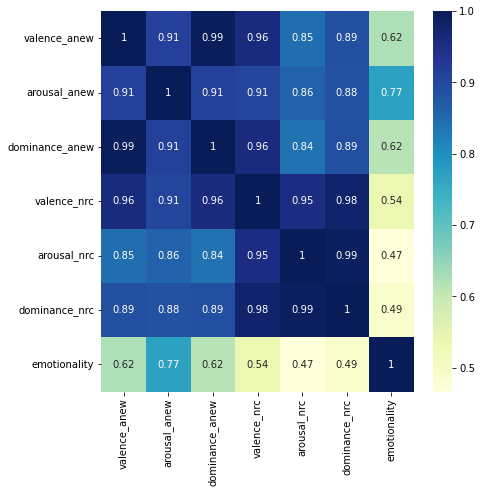

In [59]:
fig = plt.figure(figsize=(7,7))
sns.heatmap(corr_spearman, 
        xticklabels=corr_spearman.columns,
        yticklabels=corr_spearman.columns,
        annot=True
        , cmap="YlGnBu")